In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras_tuner.tuners import RandomSearch, BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters
import os
import warnings
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

Shape of train data is: (7352, 563)
Shape of test data is: (2947, 563)


In [3]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [4]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [6]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [7]:
train_data['Activity'].value_counts().sort_values()

WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
WALKING               1226
SITTING               1286
STANDING              1374
LAYING                1407
Name: Activity, dtype: int64

<AxesSubplot:>

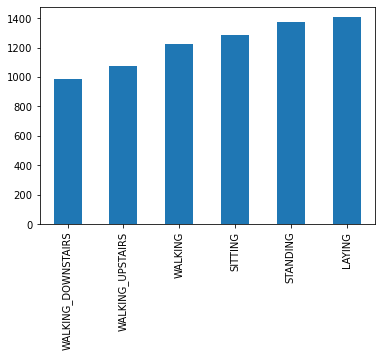

In [8]:
train_data['Activity'].value_counts().sort_values().plot(kind = "bar")

In [9]:
x_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1:]
                   #selects all rows and columns of train_data except the last 2 columns, selects only the last column of train_data
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [10]:
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_test.shape, y_test.shape

((2947, 561), (2947, 1))

In [11]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)         #Fit label encoder and return encoded labels.
y_test = le.fit_transform(y_test)
y_train, y_train

(array([2, 2, 2, ..., 5, 5, 5]), array([2, 2, 2, ..., 5, 5, 5]))

In [12]:
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)

In [13]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs= 50,validation_data = (x_test,y_test))

Epoch 1/50
115/115 [==============================] - 2s 8ms/step - loss: 1.2905 - accuracy: 0.4974 - val_loss: 1.0239 - val_accuracy: 0.7190
Epoch 2/50
115/115 [==============================] - 0s 4ms/step - loss: 0.8623 - accuracy: 0.7394 - val_loss: 0.7037 - val_accuracy: 0.8039
Epoch 3/50
115/115 [==============================] - 0s 4ms/step - loss: 0.5974 - accuracy: 0.8180 - val_loss: 0.5106 - val_accuracy: 0.8795
Epoch 4/50
115/115 [==============================] - 0s 4ms/step - loss: 0.4519 - accuracy: 0.8644 - val_loss: 0.4175 - val_accuracy: 0.8554
Epoch 5/50
115/115 [==============================] - 0s 4ms/step - loss: 0.3706 - accuracy: 0.8844 - val_loss: 0.3453 - val_accuracy: 0.9013
Epoch 6/50
115/115 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.8984 - val_loss: 0.3111 - val_accuracy: 0.8911
Epoch 7/50
115/115 [==============================] - 1s 5ms/step - loss: 0.2748 - accuracy: 0.9093 - val_loss: 0.2661 - val_accuracy: 0.9169
Epoch 

In [25]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 25)):   #number of layers varied between 2 and 25
        model.add(layers.Dense(units = hp.Int('units' + str(i), min_value=32, max_value=512, step=32),
                               kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']),
                               activation= hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
    model.add(layers.Dense(6, kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']), activation='softmax'))
    model.add(
            Dropout(0.2))
    model.compile(
        optimizer = 'adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials= 5,
    executions_per_trial=3,
    overwrite = True,
    directory='project', project_name = 'Human_activity_recognition')

tuner.search_space_summary()

"""tuner = BayesianOptimization(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial=3,
    num_initial_points=5,
    directory='project', project_name = 'Human_activity_recognition

)"""

"""keras_tuner.BayesianOptimization(
    hypermodel=None,
    objective=None,
    max_trials=10,
    num_initial_points=None,
    alpha=0.0001,
    beta=2.6,
    seed=None,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    max_retries_per_trial=0,
    max_consecutive_failed_trials=3,
    **kwargs
)"""

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 25, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
initializer (Choice)
{'default': 'uniform', 'conditions': [], 'values': ['uniform', 'normal'], 'ordered': False}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


'keras_tuner.BayesianOptimization(\n    hypermodel=None,\n    objective=None,\n    max_trials=10,\n    num_initial_points=None,\n    alpha=0.0001,\n    beta=2.6,\n    seed=None,\n    hyperparameters=None,\n    tune_new_entries=True,\n    allow_new_entries=True,\n    max_retries_per_trial=0,\n    max_consecutive_failed_trials=3,\n    **kwargs\n)'

In [ ]:

tuner.search(x_train, y_train,
             epochs= 50,
             validation_data=(x_test, y_test))

Trial 2 Complete [00h 14m 44s]
val_accuracy: 0.18221920728683472

Best val_accuracy So Far: 0.9390340447425842
Total elapsed time: 00h 18m 18s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
9                 |5                 |num_layers
64                |320               |units0
uniform           |normal            |initializer
sigmoid           |relu              |activation
224               |96                |units1
96                |32                |units2
320               |32                |units3
160               |32                |units4
320               |None              |units5
64                |None              |units6
352               |None              |units7
64                |None              |units8
64                |None              |units9
160               |None              |units10
512               |None              |units11
384               |None              |units12
224               |None              |uni

230/230 [==============================] - 4s 19ms/step - loss: 4.4335 - accuracy: 0.1892 - val_loss: 1.7901 - val_accuracy: 0.1822
Epoch 35/50
230/230 [==============================] - 5s 21ms/step - loss: 4.5283 - accuracy: 0.1897 - val_loss: 1.7902 - val_accuracy: 0.1805
Epoch 36/50
230/230 [==============================] - 5s 20ms/step - loss: 4.4095 - accuracy: 0.1865 - val_loss: 1.7908 - val_accuracy: 0.1822
Epoch 37/50
173/230 [=====================>........] - ETA: 0s - loss: 4.4125 - accuracy: 0.1918

In [22]:
tuner.results_summary()

Results summary
Results in project\Human_activity_recognition
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
num_layers: 3
units0: 224
initializer: uniform
activation: tanh
units1: 384
units2: 256
units3: 320
units4: 32
units5: 352
units6: 160
units7: 128
units8: 352
units9: 416
units10: 160
units11: 160
units12: 480
units13: 384
units14: 64
units15: 32
units16: 352
units17: 512
units18: 416
units19: 416
units20: 64
units21: 352
units22: 128
units23: 256
Score: 0.9581495324770609

Trial 1 summary
Hyperparameters:
num_layers: 8
units0: 512
initializer: normal
activation: relu
units1: 416
units2: 192
units3: 256
units4: 384
units5: 256
units6: 448
units7: 384
units8: 384
units9: 256
units10: 288
units11: 64
units12: 64
units13: 320
units14: 96
units15: 96
units16: 384
units17: 32
units18: 288
units19: 256
units20: 448
units21: 256
units22: 480
units23: 160
Score: 0.9233118494351705

Trial 2 summary
Hyperparameters:
num_layers: 21


In [17]:
model=tuner.get_best_models(num_models=1)[0]
history = model.fit(x_train,y_train, epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
230/230 [==============================] - 4s 13ms/step - loss: 0.6452 - accuracy: 0.7847 - val_loss: 0.5023 - val_accuracy: 0.9437
Epoch 2/50
230/230 [==============================] - 2s 9ms/step - loss: 0.5915 - accuracy: 0.7860 - val_loss: 0.9681 - val_accuracy: 0.9080
Epoch 3/50
230/230 [==============================] - 2s 9ms/step - loss: 0.5776 - accuracy: 0.7871 - val_loss: 0.5625 - val_accuracy: 0.9277
Epoch 4/50
230/230 [==============================] - 2s 10ms/step - loss: 0.6144 - accuracy: 0.7858 - val_loss: 0.5742 - val_accuracy: 0.9444
Epoch 5/50
230/230 [==============================] - 2s 9ms/step - loss: 0.6448 - accuracy: 0.7745 - val_loss: 0.9056 - val_accuracy: 0.9111
Epoch 6/50
230/230 [==============================] - 2s 9ms/step - loss: 0.6246 - accuracy: 0.7792 - val_loss: 0.9372 - val_accuracy: 0.9158
Epoch 7/50
230/230 [==============================] - 2s 9ms/step - loss: 0.5780 - accuracy: 0.7904 - val_loss: 1.4358 - val_accuracy: 0.8850
Epoc

In [18]:
model.summary()
import tensorflow as tf

from tensorflow import keras

Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
mo_fitt = model.fit(x_train,y_train, epochs=30, validation_data=(x_test,y_test), callbacks=Callback)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224)               125888    
                                                                 
 dense_1 (Dense)             (None, 384)               86400     
                                                                 
 dense_2 (Dense)             (None, 256)               98560     
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
Total params: 312,390
Trainable params: 312,390
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
230/230 [==============================

[0.789309024810791, 0.7723068594932556, 0.7835962772369385, 0.791757345199585, 0.7946137189865112, 0.7879488468170166, 0.7844123840332031, 0.7856365442276001]


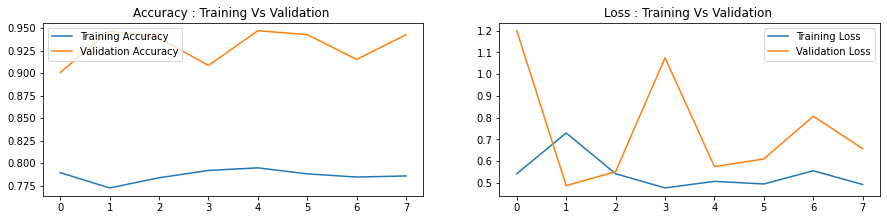

In [19]:
accuracy = mo_fitt.history['accuracy']
print(accuracy)
loss = mo_fitt.history['loss']
validation_loss = mo_fitt.history['val_loss']
validation_accuracy = mo_fitt.history['val_accuracy']



plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation ')



plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()